In [65]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, interpolate
from scipy.interpolate import CubicSpline
from tqdm import tqdm
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
from astropy.visualization.hist import hist as fancyhist
from sklearn.neighbors import KernelDensity

In [66]:
spin = np.random.uniform(0, 1, 10000)
mass = np.random.normal(1, 0.02, 10000)

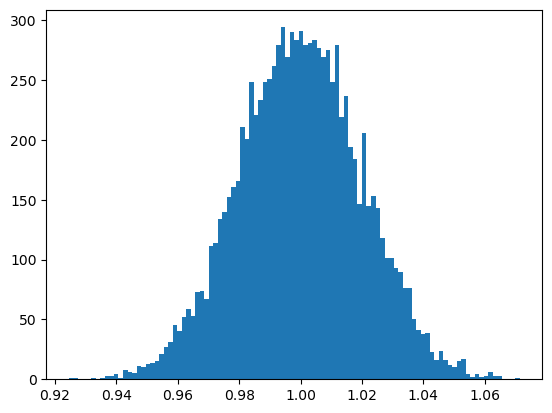

In [67]:
plt.hist(mass, bins = 100)
plt.show()

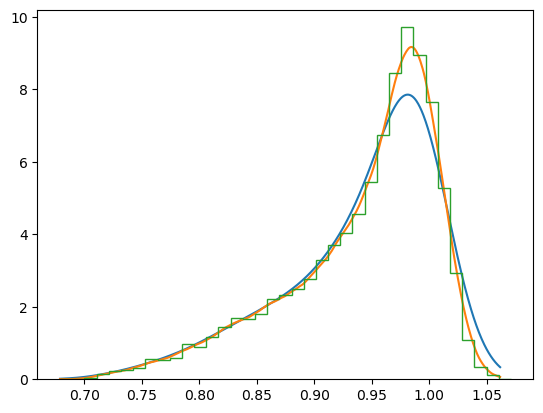

In [68]:
Mirr = mass * ((1 + (1-spin**2)**0.5)/2)**0.5
xgrid = np.linspace(Mirr.min(),Mirr.max(),1000)  # Use this instead of 'x' for plotting
def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)
PDFtophat = kde_sklearn(Mirr,bandwidth=0.02,kernel="gaussian")
plt.plot(xgrid,PDFtophat) 

PDFtophat = kde_sklearn(Mirr,bandwidth=0.02,kernel="epanechnikov") 
plt.plot(xgrid,PDFtophat) 

counts, bins, bars = fancyhist(Mirr, bins="scott", histtype="step",density=True)

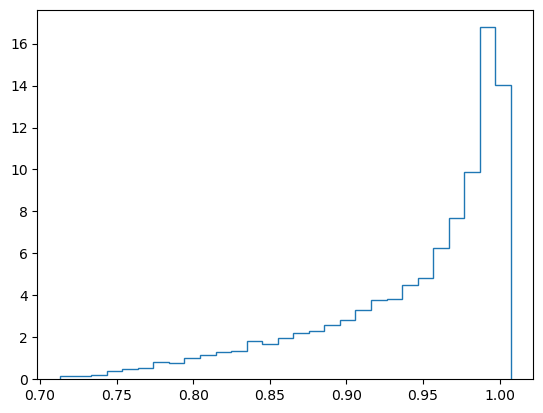

In [69]:
f = Mirr/mass
counts2, bins2, bars2 = fancyhist(f, bins="scott", histtype="step",density=True)

In [89]:
mu = 1
sigma = np.arange(0.001, 3, 0.002)
ks_f = np.zeros(len(sigma))
ks_M = np.zeros(len(sigma))
for i in tqdm(range(len(sigma))):
    spin = np.random.uniform(0, 1, 10000)
    mass = (np.random.normal(mu, sigma[i], 10000))/mu
    Mirr = (mass * ((1 + (1-spin**2)**0.5)/2)**0.5)/mu
    f = Mirr/mass
    ks_f[i] = stats.kstest(Mirr, f).statistic
    ks_M[i] = stats.kstest(Mirr, mass).statistic

100%|██████████| 1500/1500 [00:20<00:00, 72.79it/s]


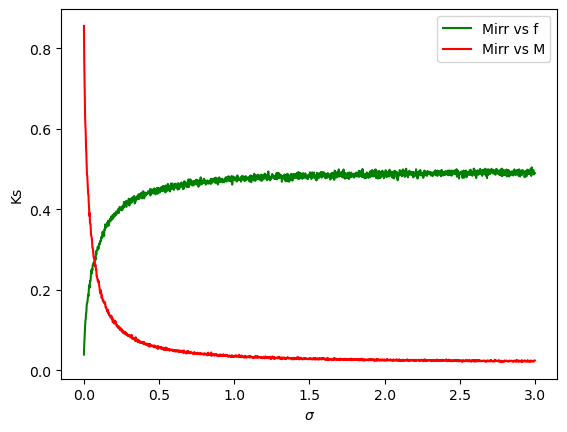

In [90]:
plt.plot(sigma/mu, ks_f, color = 'green', label = 'Mirr vs f')
plt.plot(sigma/mu, ks_M, color = 'red', label = 'Mirr vs M')
plt.xlabel('$\sigma$')
plt.ylabel('Ks')
plt.legend()
plt.show()